In [5]:
from a3_utils import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
import os

In [6]:
def gauss(sigma):
    gauss_kernel = []
    for x in range(math.floor(- 3 * sigma), math.ceil(3 * sigma) + 1):
        result_x = (1 / (math.sqrt(2 * math.pi) * sigma)) * \
            math.exp(-((x ** 2) / (2 * (sigma ** 2))))
        gauss_kernel.append(result_x)
    return np.array(gauss_kernel) / sum(gauss_kernel)

def gaussfilter(img, sigma):
    gauss_kernel = gauss(sigma)
    convolved_img = cv2.filter2D(img, -1, gauss_kernel)
    convolved_img = cv2.filter2D(convolved_img, -1, gauss_kernel.T)
    return convolved_img

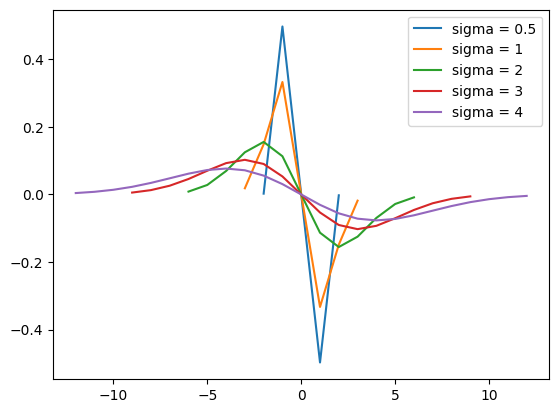

In [7]:
# (b) Implement a function that computes the derivative of a 1-D Gaussian kernel. 

def gaussdx(sigma):
    gaussdx_kernel = []
    for x in range(math.floor(- 3 * sigma), math.ceil(3 * sigma) + 1):
        result_x = (-1 / (math.sqrt(2 * math.pi) * sigma ** 3)) * x * math.exp(-(x ** 2 / (2 * sigma ** 2)))
        gaussdx_kernel.append(result_x)
    return np.array(gaussdx_kernel) / sum(np.abs(gaussdx_kernel))

gaussdx_kernel_0_5 = gaussdx(0.5)
gaussdx_kernel_1 = gaussdx(1)
gaussdx_kernel_2 = gaussdx(2)
gaussdx_kernel_3 = gaussdx(3)
gaussdx_kernel_4 = gaussdx(4)
plt.plot(np.arange(math.floor(- 3 * 0.5), math.ceil(3 * 0.5) + 1),
         gaussdx_kernel_0_5, label='sigma = 0.5')
plt.plot(np.arange(math.floor(- 3 * 1), math.ceil(3 * 1) + 1),
         gaussdx_kernel_1, label='sigma = 1')
plt.plot(np.arange(math.floor(- 3 * 2), math.ceil(3 * 2) + 1),
         gaussdx_kernel_2, label='sigma = 2')
plt.plot(np.arange(math.floor(- 3 * 3), math.ceil(3 * 3) + 1),
         gaussdx_kernel_3, label='sigma = 3')
plt.plot(np.arange(math.floor(- 3 * 4), math.ceil(3 * 4) + 1),
         gaussdx_kernel_4, label='sigma = 4')
plt.legend()
plt.show()

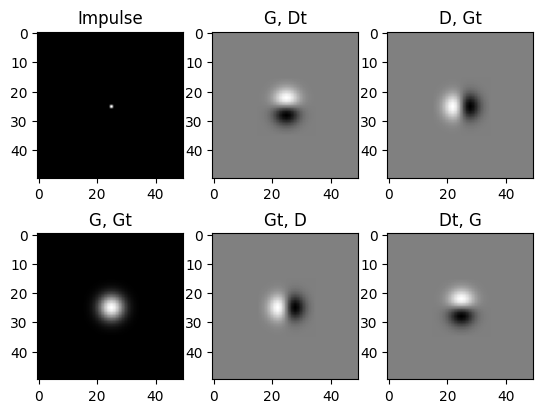

In [8]:
# (c) Generate a 1-D Gaussian kernel G and a Gaussian derivative kernel D. 
# What happens if you apply the following operations to the impulse image?

impulse = np.zeros((50, 50))
impulse[25, 25] = 1

G=gauss(3).reshape(1,-1)
GT=G.T
G=np.flip(G)
GT=np.flip(GT)

D=gaussdx(3).reshape(1,-1)
DT=D.T
D=np.flip(D)
DT=np.flip(DT)

# a)
conv_G_Gt = cv2.filter2D(impulse, -1, G)
conv_G_Gt = cv2.filter2D(conv_G_Gt, -1, GT)
# b) 
conv_G_Dt = cv2.filter2D(impulse, -1, G)
conv_G_Dt = cv2.filter2D(conv_G_Dt, -1, DT)
# c)
conv_D_Gt = cv2.filter2D(impulse, -1, D)
conv_D_Gt = cv2.filter2D(conv_D_Gt, -1, GT)
# d)
conv_Gt_D = cv2.filter2D(impulse, -1, GT)
conv_Gt_D = cv2.filter2D(conv_Gt_D, -1, D)
# e)
conv_Dt_G = cv2.filter2D(impulse, -1, DT)
conv_Dt_G = cv2.filter2D(conv_Dt_G, -1, G)

plt.subplot(2, 3, 1)
plt.imshow(impulse, cmap='gray')
plt.title('Impulse')
plt.subplot(2, 3, 2)
plt.imshow(conv_G_Dt, cmap='gray')
plt.title('G, Dt')
plt.subplot(2, 3, 3)
plt.imshow(conv_D_Gt, cmap='gray')
plt.title('D, Gt')
plt.subplot(2, 3, 4)
plt.imshow(conv_G_Gt, cmap='gray')
plt.title('G, Gt')
plt.subplot(2, 3, 5)
plt.imshow(conv_Gt_D, cmap='gray')
plt.title('Gt, D')
plt.subplot(2, 3, 6)
plt.imshow(conv_Dt_G, cmap='gray')
plt.title('Dt, G')
plt.show()

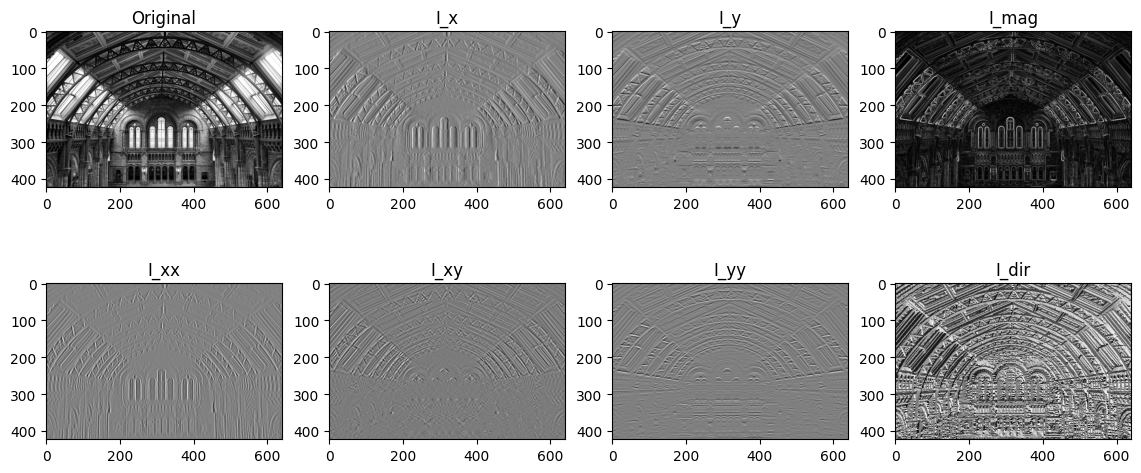

In [11]:
# (d) Implement a function that uses functions gauss and gaussdx to compute both partial derivatives
# of a given image with respect to x and with respect to y.

def compute_derivative(img, sigma):
    G=gauss(sigma).reshape(1,-1)
    GT=G.T
    G=np.flip(G)
    GT=np.flip(GT)

    D=gaussdx(sigma).reshape(1,-1)
    DT=D.T
    D=np.flip(D)
    DT=np.flip(DT)

    img_Gt = cv2.filter2D(img, -1, D)
    deriv_x = cv2.filter2D(img_Gt, -1, GT)
    img_G = cv2.filter2D(img, -1, G)
    deriv_y = cv2.filter2D(img_G, -1, DT)
    return deriv_x, deriv_y

def gradient_magnitude(img, sigma):
    Ix,Iy=compute_derivative(img,sigma)

    M=np.sqrt(Ix**2+Iy**2)

    angle=np.arctan2(Iy,Ix)

    return M,angle

museum_img = cv2.imread("images/museum.jpg", cv2.IMREAD_GRAYSCALE)
img_x, img_y = compute_derivative(museum_img / 255, 1)
img_mag,img_dir = gradient_magnitude(museum_img / 255, 1)
img_xx, img_xy = compute_derivative(img_x, 1)
img_yx, img_yy = compute_derivative(img_y, 1)
plt.figure(figsize=(14,6))
plt.subplot(2, 4, 1)
plt.imshow(museum_img, cmap="gray")
plt.title("Original")
plt.subplot(2,4,2)
plt.imshow(img_x, cmap='gray')
plt.title('I_x')
plt.subplot(2,4,3)
plt.imshow(img_y, cmap='gray')
plt.title('I_y')
plt.subplot(2,4,4)
plt.imshow(img_mag, cmap='gray')
plt.title('I_mag')
plt.subplot(2,4,5)
plt.imshow(img_xx, cmap='gray')
plt.title('I_xx')
plt.subplot(2,4,6)
plt.imshow(img_xy, cmap='gray')
plt.title('I_xy')
plt.subplot(2,4,7)
plt.imshow(img_yy, cmap='gray')
plt.title('I_yy')
plt.subplot(2,4,8)
plt.imshow(img_dir, cmap='gray')
plt.title('I_dir')
plt.show()

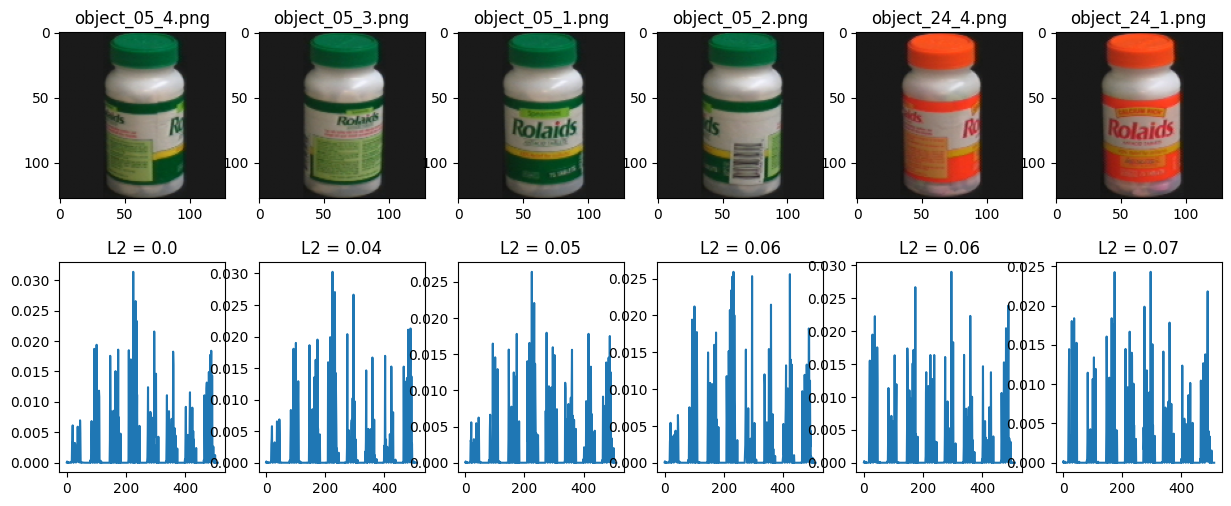

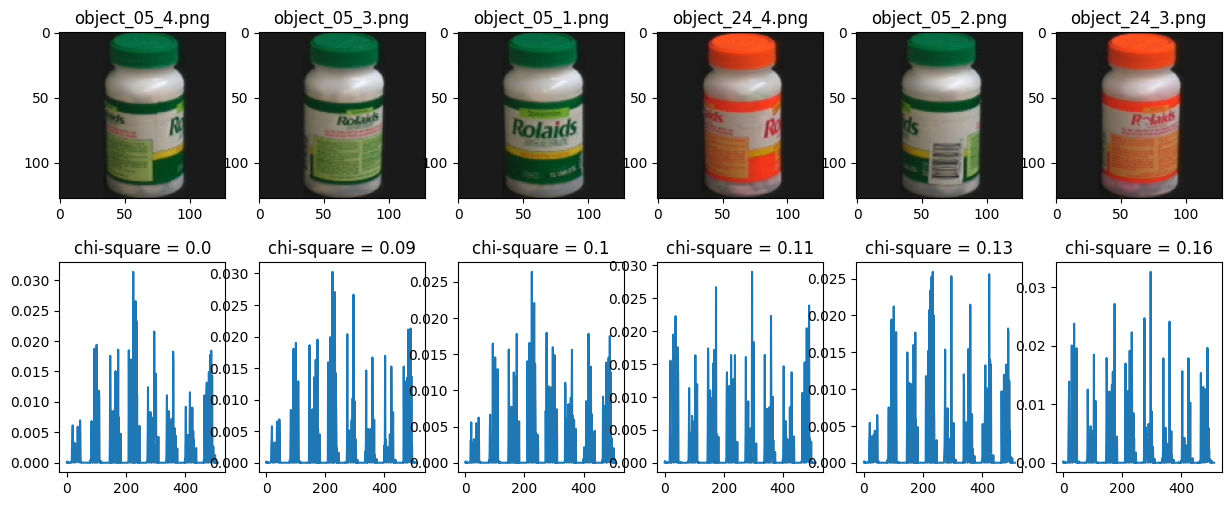

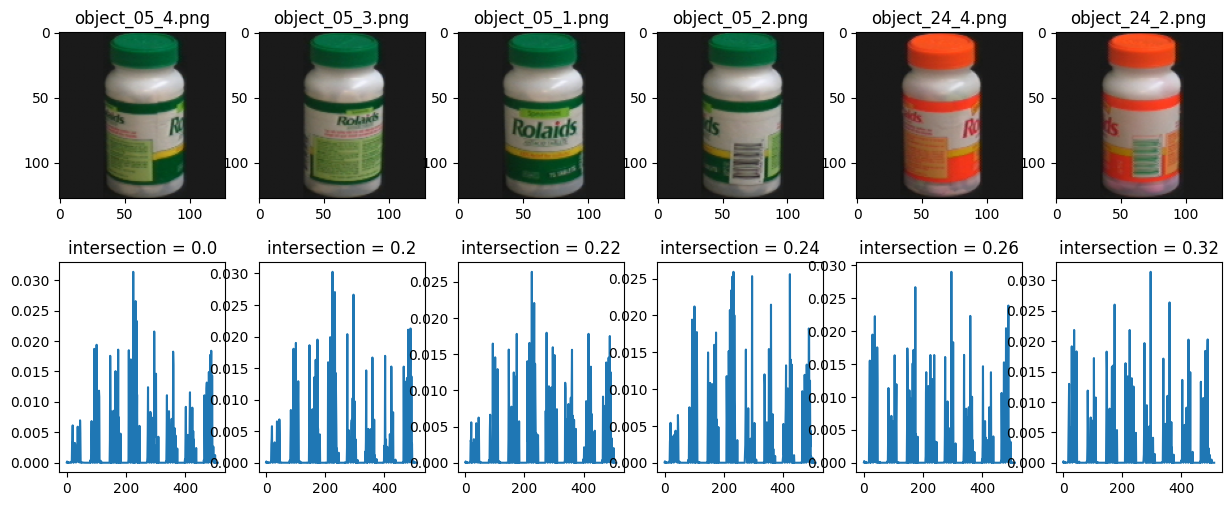

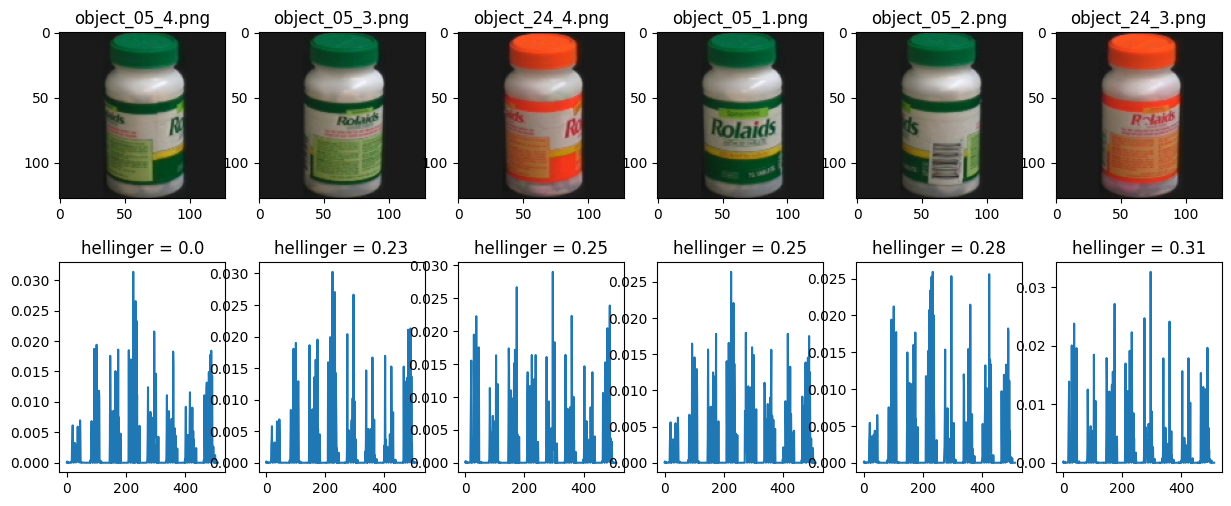

In [10]:
# (e) Extend your image retrieval system from the previous assignment to use a simple gradient-based feature instead of color histograms.

def compare_histograms(hist1, hist2, distance_measure):
    if distance_measure == 'L2':
        distance = np.sum((hist1 - hist2) ** 2) ** (1 / 2)
    elif distance_measure == 'chi-square':
        distance = (1 / 2) * np.sum(((hist1 - hist2) ** 2) /
                                    (hist1 + hist2 + 1e-10))
    elif distance_measure == 'intersection':
        distance = 1 - np.sum(np.minimum(hist1, hist2))
    elif distance_measure == 'hellinger':
        distance = (
            (1 / 2) * np.sum((hist1 ** (1 / 2) - hist2 ** (1 / 2)) ** 2)) ** (1 / 2)
    return distance

def calculate_gradient_histograms(image_directory, n_bins):
    image_histograms = {}
    image_files = [img for img in os.listdir(image_directory)]

    for img in image_files:
        image_path = os.path.join(image_directory, img)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) / 255
        magnitude, gradient_angle = gradient_magnitude(image, 1)

        cells = np.array_split(image, 8, axis=0)
        cells = [np.array_split(cell, 8, axis=1) for cell in cells]

        angle_values = np.linspace(-np.pi, np.pi, n_bins)

        histograms = []
        for i, row in enumerate(cells):
            for j, cell in enumerate(row):
                hist = np.zeros(n_bins)
                start_row = i * (image.shape[0] // 8)
                end_row = start_row + cell.shape[0]
                start_col = j * (image.shape[1] // 8)
                end_col = start_col + cell.shape[1]

                cell_magnitudes = magnitude[start_row:end_row, start_col:end_col]
                cell_angles = gradient_angle[start_row:end_row, start_col:end_col]

                quantized_angles = np.digitize(cell_angles, bins=angle_values)
                for angle_bin in range(1, n_bins + 1):
                    hist[angle_bin - 1] += np.sum(cell_magnitudes[quantized_angles == angle_bin])

                histograms.append(hist)
        image_feature = np.concatenate(histograms)
        image_histograms[image_path] = image_feature / np.sum(image_feature)
    return image_histograms


def compute_distances(histograms, main_img, distance_measure):
    distances = {}
    for image, hist in histograms.items():
        dist = compare_histograms(
            histograms[main_img], hist, distance_measure)
        distances[image] = dist
    return distances


path = 'dataset'
histograms = calculate_gradient_histograms(path, 8)
main_img_path = 'dataset/object_05_4.png'

for distance_measure in ['L2', 'chi-square', 'intersection', 'hellinger']:

    distances = compute_distances(histograms, main_img_path, distance_measure)
    sorted_distances = dict(sorted(distances.items(), key=lambda x: x[1]))

    main_img = cv2.imread(main_img_path)
    main_img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB) / 255
    plt.figure(figsize=(15, 6))

    plt.subplot(2, 6, 1)
    plt.imshow(main_img)
    plt.title(main_img_path[8:])
    plt.subplot(2, 6, 7)
    plt.plot(histograms[main_img_path])
    plt.title(distance_measure + ' = ' +
              str(round(distances[main_img_path], 2)))

    idx = 2
    for image_path, distance in list(sorted_distances.items())[1:6]:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255
        plt.subplot(2, 6, idx)
        plt.imshow(img)
        plt.title(image_path[8:])
        plt.subplot(2, 6, idx + 6)
        plt.plot(histograms[image_path])
        plt.title(distance_measure + ' = ' + str(round(distance, 2)))
        idx += 1

    plt.show()